In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

In [4]:
# Define some types

Func= Callable[..., np.float64]

# Monte Carlo Integration

$$
I(f) = \int_{\Omega} f(x) \, dx, \quad x\in\mathbb{R}^d
$$

## Numerical Integration

Any numerical integration method (including Monte Carlo Method) can be written in the following form:

$$
I_N(f) \approx \sum_{i=1}^N A_i f(x_i)
$$

In [9]:
a = 0.0
b = 1.0

In [6]:
tmp = b
b = a
a = tmp

In [11]:
a, b = b, a

In [12]:
a, b

(1.0, 0.0)

In [5]:
# quads = (points, weights)
# shape: ((N,d), (N,))
def integrate_test(f: Func, quads: tuple[np.ndarray, np.ndarray]):
    # points = quads[0]
    # weights = quads[1]
    # points, weights = quads[0], quads[1]
    points, weights = quads
    assert points.shape[0] == weights.shape[0], "Number of points and weights must be the same."
    
    num_points = points.shape[0]
    integration = 0.0 
    for i in range(num_points):
        integration += weights[i] * f(points[i])

    return integration

In [6]:
# quads = (points, weights)
# shape: ((N,d), (N,))
def integrate(f: Func, quads: tuple[np.ndarray, np.ndarray]):
    points, weights = quads
    if isinstance(weights, np.ndarray):
        assert points.shape[0] == weights.shape[0]
    # weights: (N,)
    # f(points): (N,)
    integration = np.sum(weights * f(points))
    return integration

### Example 1

$$
\int_0^{\frac{\pi}{2}} \sin x\, dx = 1,
$$

## Determinastic Methods

Trapezoidal formula (复合梯形法)

$$
I(f) \approx \{\frac{1}{2}f(x_1) + \sum_{i=2}^{N-1} f(x_i) + \frac{1}{2}f(x_N)\} \times h
$$

In [15]:
def f1(x: np.ndarray):
    return np.sin(x)

In [30]:
N = 1000
h = 0.5 * np.pi / (N-1)

points = np.linspace(0, 0.5 * np.pi, N)
weights = np.ones((N)) * h 
weights[0] = weights[-1] = 0.5 * h

In [31]:
%timeit I1 = integrate_test(f1, (points, weights))

1.07 ms ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [25]:
I1

0.999979020750832

In [32]:
%timeit I2 = integrate(f1, (points, weights))

10 µs ± 60.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [28]:
%time
errs = []

for h in [0.5, 0.25, 0.1, 0.05, 0.02, 0.01]:
    N = int(0.5 * np.pi / h) + 1
    points = np.linspace(0, 0.5 * np.pi, N)
    weights = np.ones((N)) * h 
    weights[0] = weights[-1] = 0.5 * h
    I = integrate_test(f1, (points, weights))
    errs.append(np.abs(I - 1.0))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


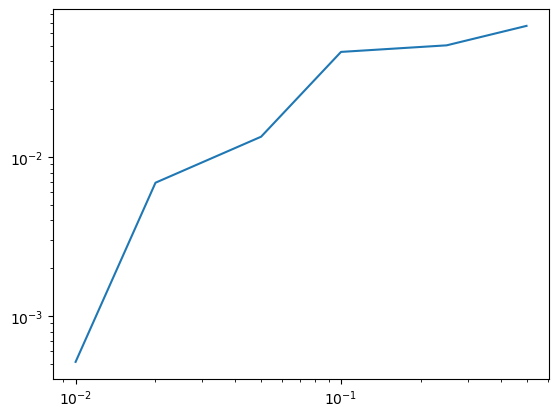

In [29]:
plt.loglog([0.5, 0.25, 0.1, 0.05, 0.02, 0.01], errs)

### Gauss

In [39]:
N = 10
a, b = 0.0, np.pi/2
points, weights = np.polynomial.legendre.leggauss(N)


In [34]:
points, weights

(array([-0.98799252, -0.93727339, -0.84820658, -0.72441773, -0.57097217,
        -0.39415135, -0.20119409,  0.        ,  0.20119409,  0.39415135,
         0.57097217,  0.72441773,  0.84820658,  0.93727339,  0.98799252]),
 array([0.03075324, 0.07036605, 0.10715922, 0.13957068, 0.16626921,
        0.186161  , 0.19843149, 0.20257824, 0.19843149, 0.186161  ,
        0.16626921, 0.13957068, 0.10715922, 0.07036605, 0.03075324]))

In [40]:

points = 0.5*(points + 1)*(b - a) + a
weights = weights * 0.5 * (b - a)

In [36]:
points, weights

(array([0.00943065, 0.04926536, 0.11921827, 0.21644181, 0.33695767,
        0.47583242, 0.62738069, 0.78539816, 0.94341564, 1.09496391,
        1.23383866, 1.35435452, 1.45157806, 1.52153096, 1.56136567]),
 array([0.02415354, 0.05526536, 0.08416265, 0.10961855, 0.13058753,
        0.14621051, 0.15584772, 0.15910458, 0.15584772, 0.14621051,
        0.13058753, 0.10961855, 0.08416265, 0.05526536, 0.02415354]))

In [41]:
Gauss_I = integrate(f1, (points, weights))

In [42]:
Gauss_I

1.0

### Stochastic Method (Monte Carlo)

$$
I_N(f) \approx \frac{\pi}{2N}\sum_{i=1}^N f(X_i), \quad X_i\sim\mathcal{U}[0,\pi/2]
$$

$$
X_{n+1} = a X_{n} + b (\text{mod } m)
$$

In [60]:
# seed X_0
seed = 1
rng = np.random.default_rng(seed)

In [67]:
# 向量化生成随机数
rng.uniform(0.0, np.pi/2, 10)

array([1.23636898, 0.30099012, 1.26035068, 0.30053092, 0.12810255,
       1.34338739, 1.35290095, 1.37686125, 0.74127405, 0.4304742 ])

In [73]:
# seed
# rng = np.random.default_rng(1)

N = 1000000
# sample points
rpoints = rng.uniform(0.0, np.pi/2, N)
weights = np.pi/2/ N * np.ones((N,))

%timeit MC_I = integrate(f1, (rpoints, weights))

2.53 ms ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [72]:
MC_I

0.9999621391088587

In [74]:
mc_errs = []
ns = []
for n in np.linspace(100, 100000, 20):
    int_n = int(n)
    ns.append(int_n)
    rpoints = rng.uniform(0.0, np.pi/2, int_n)
    weights = np.pi/2/n
    MC_I = integrate(f1, (rpoints, weights))
    mc_errs.append(np.abs(MC_I - 1.0))
    

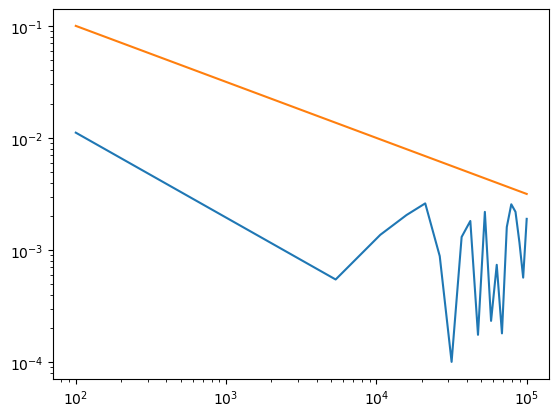

In [75]:
plt.loglog(ns, mc_errs, ns, 1.0 / np.sqrt(np.asarray(ns)))

### Example 2

$$
x, y \in [-1, 1]
$$

$$
f(x, y) = 1, \quad \text{if } x^2 + y^2 < 1
$$

$$
\int_{[0, 1]^2} f(x, y) \, dxdy
$$

In [7]:
# z: (2, N)
def f2(z):
    x = z[0]
    y = z[1]
    
    return (x**2 + y**2 < 1) * 1.0
    

In [8]:
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
z = np.meshgrid(x, y)

In [9]:
Z = f2(np.asarray(z))

In [10]:
Z.shape

(100, 100)

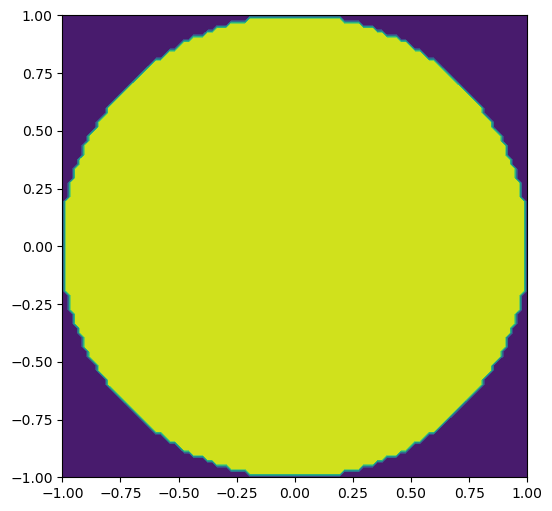

In [11]:
X, Y = z
fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(X, Y, Z)

### Monte Carlo

In [12]:
# seed
rng = np.random.default_rng(1)

In [13]:
N = 10000000
# sample points
rpoints = rng.uniform(-1.0, 1.0, (2, N))
weights = 4.0 / N

MC_I_2d = integrate(f2, (rpoints, weights))

In [14]:
MC_I_2d

3.1417296000000006

### 中矩形公式

In [18]:
nx = ny = 10000
h = 2.0 / nx
x = np.arange(-1.0 + 0.5*h, 1.0, h)
y = np.arange(-1.0 + 0.5*h, 1.0, h)
# (2, N=nx*xy)
xy = np.asarray(np.meshgrid(x, y))
points = xy.reshape(2, -1)
weights = h**2

In [19]:
I3 = integrate(f2, (points, weights))

In [20]:
I3

3.1415942400000114

### Example 3

$$
\int_{[0, 1]^d} e^{-x} \, dx
$$